In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data = pd.merge(ride_data, city_data, on="city", how="left")

In [3]:
# Display the data table for preview
merged_data.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

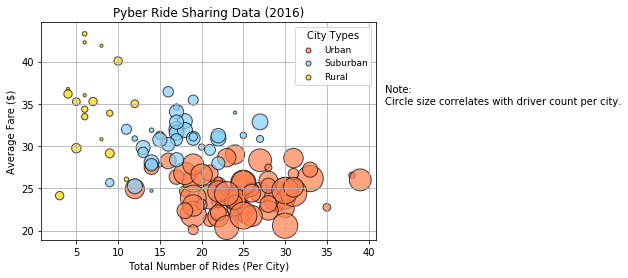

In [11]:
# Obtain the x and y coordinates for each of the three city types
urban_data = merged_data.loc[merged_data.type == 'Urban']
#print(urban_data)
urban_city_data = urban_data.groupby(['city'])
urban_avg_fare = urban_city_data['fare'].mean()
#print(urban_avg_fare)
urban_ride_count = urban_city_data['ride_id'].count()
#print(urban_ride_count)
urban_driver_count = urban_city_data['driver_count'].max()
#print(urban_driver_count)

suburban_data = merged_data.loc[merged_data.type == 'Suburban']
#print(urban_data)
suburban_city_data = suburban_data.groupby(['city'])
suburban_avg_fare = suburban_city_data['fare'].mean()
#print(suburban_avg_fare)
suburban_ride_count = suburban_city_data['ride_id'].count()
#print(suburban_ride_count)
suburban_driver_count = suburban_city_data['driver_count'].max()
#print(suburban_driver_count)

rural_data = merged_data.loc[merged_data.type == 'Rural']
#print(urban_data)
rural_city_data = rural_data.groupby(['city'])
rural_avg_fare = rural_city_data['fare'].mean()
#print(rural_avg_fare)
rural_ride_count = rural_city_data['ride_id'].count()
#print(rural_ride_count)
rural_driver_count = rural_city_data['driver_count'].max()
#print(rural_driver_count)

# Build the scatter plots for each city types
plt.scatter(urban_ride_count, urban_avg_fare, s=10 * urban_driver_count, c="coral", alpha = 0.7, edgecolor="black", label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10 * suburban_driver_count, c="lightskyblue", alpha = 0.7, edgecolor="black", label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10 * rural_driver_count, c="gold", alpha = 0.7, edgecolor="black", label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 9, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
legend.legendHandles[2]._sizes = [25]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.grid()
plt.savefig("PyberBubblePlot.png")

# Show plot
plt.show()

## Total Fares by City Type

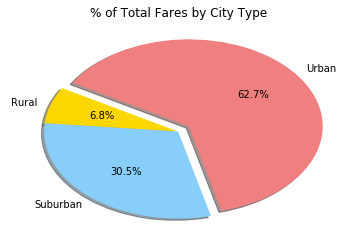

In [12]:
# Calculate Type Percents
city_type = merged_data.groupby(['type'])
city_type_fares = city_type['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(city_type_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("PyberFaresPie.png")

# Show Figure
plt.show()

## Total Rides by City Type

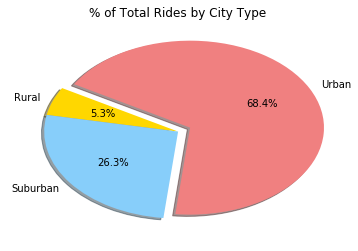

In [13]:
# Calculate Ride Percents
city_type_rides = city_type['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(city_type_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("PyberRidesPie.png")

# Show Figure
plt.show()

## Total Drivers by City Type

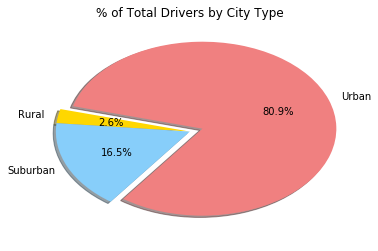

In [14]:
# Calculate Driver Percents
city_type_data = city_data.groupby(['type'])
city_type_drivers = city_type_data['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(city_type_drivers, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("PyberDriversPie.png")

# Show Figure
plt.show()